<a href="https://colab.research.google.com/github/tarumi283/tarumi/blob/main/One_factor_ANOVA%2C_no_repetition__Tukey_HSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

データの先頭部分:
   group  value
0    SA   3696
1    SA   2668
2    SA   2680
3    SA   2462
4    SA   2613

一元配置分散分析の結果:
                sum_sq    df          F        PR(>F)
C(group)  17710442.55   3.0  90.746311  2.934247e-10
Residual   1040876.40  16.0        NaN           NaN

Tukey HSDの結果:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     S     SA    -62.8 0.9793 -524.3199  398.7199  False
     S      Y   1789.8    0.0 1328.2801 2251.3199   True
     S     YA   1906.8    0.0 1445.2801 2368.3199   True
    SA      Y   1852.6    0.0 1391.0801 2314.1199   True
    SA     YA   1969.6    0.0 1508.0801 2431.1199   True
     Y     YA    117.0 0.8856 -344.5199  578.5199  False
--------------------------------------------------------


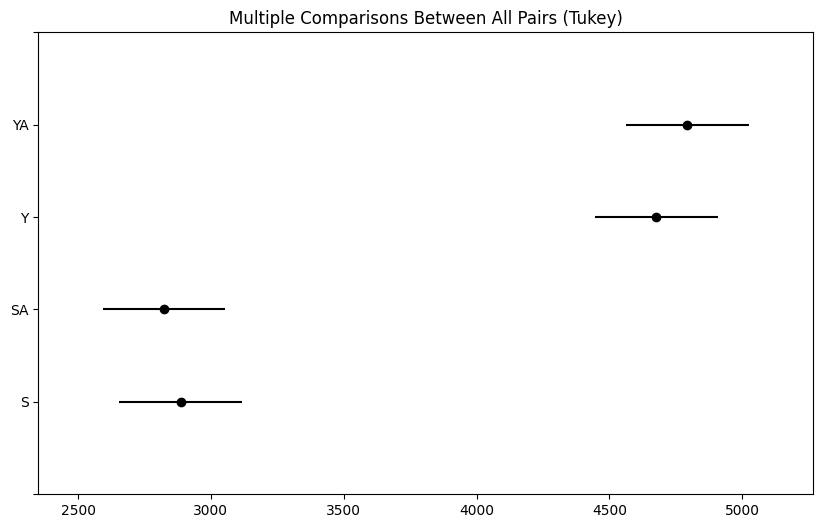

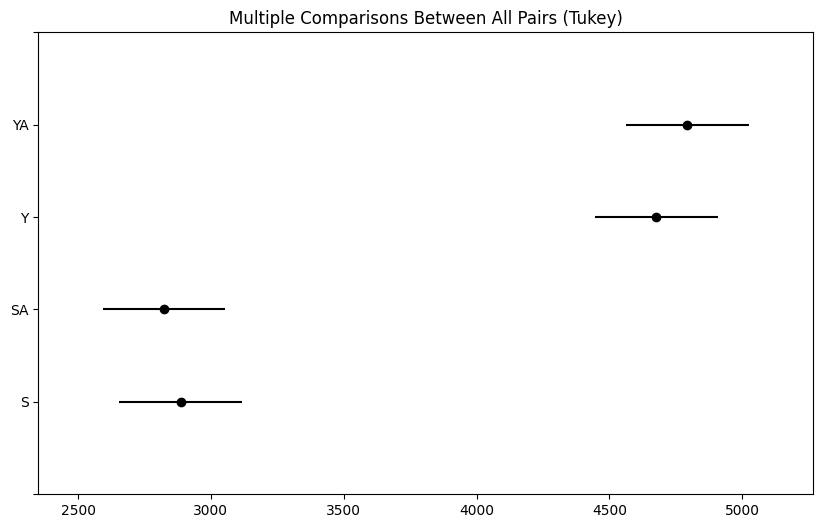

In [6]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# CSVファイルの読み込み（ファイルパスを適切に設定してください）
csv_file_path = '/content/Q4.csv'  # ここをCSVファイルのパスに置き換える
data = pd.read_csv(csv_file_path)

# データの確認
print("データの先頭部分:\n", data.head())

# 一元配置分散分析の実行
model = ols('value ~ C(group)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n一元配置分散分析の結果:\n", anova_table)

# TukeyのHSD検定（多重比較）の実行
tukey_result = pairwise_tukeyhsd(endog=data['value'], groups=data['group'], alpha=0.05)
print("\nTukey HSDの結果:")
print(tukey_result)

# Tukey HSD検定の結果をグラフで表示（オプション）
tukey_result.plot_simultaneous()